In [ ]:
## DATASET- PLANE CRASH FROM 1950 - 2009.
### Analysis of the plane crash dataset from 1950 TO 2009.It's a full history of airplane crashes throughout the world hosted by Thinkful which is available at: https://tf-curricula-prod.s3.amazonaws.com/assets/plane_crashes_data.csv 
### We can infer the following questions:
### 1 How many planes crashed per decade? How many people were on board? How many survived? How many died? 
### 2 Highest number of crashes by operator and Type of aircrafts. 
### 3 Find the number of crashed aircrafts and number of deaths against each category from above step.
### 4 Find any interesting trends/behaviors that you encounter when you analyze the dataset.
### And the "Summary" field has the details about the crashes. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
### A brief description about the dataset for a quick glance reveals about the data and the associated information.
crash = pd.read_csv("plane_crashes_data.csv")
crash.head()


,month,hour,year,location,operator,route,type,aboard,fatalities,summary
0,1,12,1950,"Near Vacas, Bolivia",Military - Bolivian Air Force,Valle grande - Cochabamba,Douglas C-47,32,32,Crashed while en route in the Andes mountains ...
1,3,20,1950,"Minneapolis, Minnesota",Northwest Orient Airlines,Rochester Minn. - Minneapolis,Martin 202,13,13,"Crashed into a flag pole, well marked by red n..."
2,3,14,1950,"Llandow Airport, Cardiff, Wales",Fairflight Ltd.,Llandow - Dublin,Avro 689 Tudor 5,83,80,During the approach to Runway 28 at Llandow Ai...
3,4,23,1950,"Near Atsugi, Japan",Military - U.S. Air Force,Philippines - Japan,Douglas C-54D,35,35,Flew off its prescribed course and crashed int...
4,5,20,1950,"Lagens Air Force Base, Azores",Military - U.S. Air Force,Bermuda - England,Boeing B-29,16,16,Crashed while attempting to land after being d...


In [4]:
### The total number of deaths occured from "Military - U.S. Air Force" alone are 2722 from 1950 to 2009.
op_fat = crash[crash["operator"] == "Military - U.S. Air Force"]
op_fat["fatalities"].sum()


2722

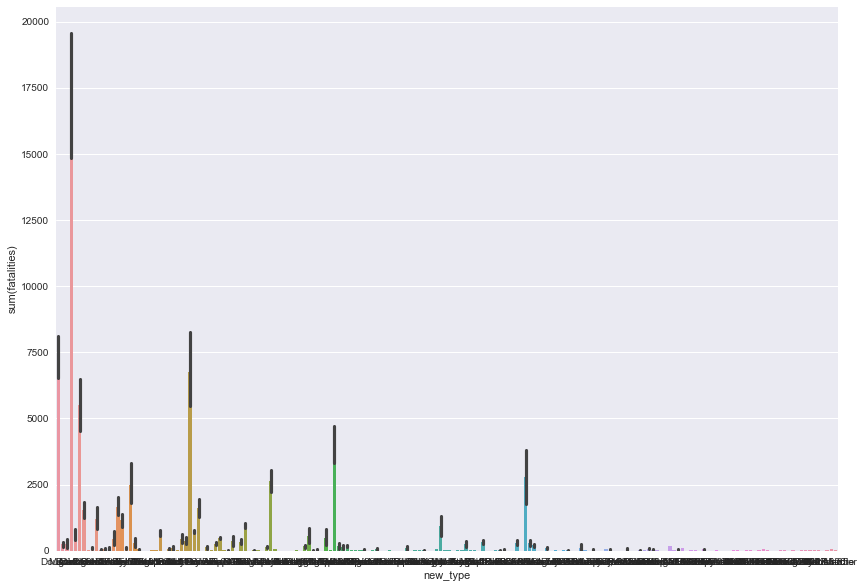

In [44]:
crash.dropna(subset=["type"],how="any")

def get_first_word(input_str):
    input_str = str(input_str)
    return (input_str.split()[0])

crash['new_type'] = crash['type'].apply(get_first_word)
plt.figure(figsize=(14,10))
sns.barplot(x="new_type",y="fatalities", estimator=sum,data=crash)
plt.show()

In [32]:
## Military plane crashes alone were responsible for 6905 deaths across the globe.
x = crash.dropna(how="any")
only_military = x[x["operator"].str.contains("Military")]
print("The percentage of deaths caused by military aircrafts were: " + str((only_military.fatalities.sum() / crash["fatalities"].sum() ) * 100 ) + "%")

The percentage of deaths caused by military aircrafts were: 9.873171568697542%


In [7]:
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'

crash["Season"] = crash["month"].apply(get_season)
crash.head()

,month,hour,year,location,operator,route,type,aboard,fatalities,summary,new_type,Season
0,1,12,1950,"Near Vacas, Bolivia",Military - Bolivian Air Force,Valle grande - Cochabamba,Douglas C-47,32,32,Crashed while en route in the Andes mountains ...,Douglas,winter
1,3,20,1950,"Minneapolis, Minnesota",Northwest Orient Airlines,Rochester Minn. - Minneapolis,Martin 202,13,13,"Crashed into a flag pole, well marked by red n...",Martin,spring
2,3,14,1950,"Llandow Airport, Cardiff, Wales",Fairflight Ltd.,Llandow - Dublin,Avro 689 Tudor 5,83,80,During the approach to Runway 28 at Llandow Ai...,Avro,spring
3,4,23,1950,"Near Atsugi, Japan",Military - U.S. Air Force,Philippines - Japan,Douglas C-54D,35,35,Flew off its prescribed course and crashed int...,Douglas,spring
4,5,20,1950,"Lagens Air Force Base, Azores",Military - U.S. Air Force,Bermuda - England,Boeing B-29,16,16,Crashed while attempting to land after being d...,Boeing,spring


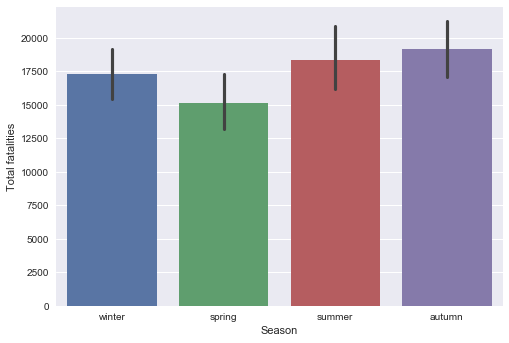

In [41]:
### The classification of number of fatalities according to the seasons
sns.barplot(x="Season",y="fatalities", estimator=sum,data=crash)
plt.ylabel("Total fatalities")
plt.show()

In [9]:
def get_decade(year):
    if year >= 1950 and year <= 1959:
        return '1950 to 1959'
    elif year >= 1960 and year <= 1969:
        return '1960 to 1969'
    elif year >= 1970 and year <= 1979:
        return '1970 to 1979'
    elif year >= 1980 and year <= 1989:
        return '1980 to 1989'
    elif year >= 1990 and year <= 1999:
        return '1990 to 1999'
    else:
        return '2000 to 2009'
    
crash["Decade"] = crash["year"].apply(get_decade)
crash.head()

,month,hour,year,location,operator,route,type,aboard,fatalities,summary,new_type,Season,Decade
0,1,12,1950,"Near Vacas, Bolivia",Military - Bolivian Air Force,Valle grande - Cochabamba,Douglas C-47,32,32,Crashed while en route in the Andes mountains ...,Douglas,winter,1950 to 1959
1,3,20,1950,"Minneapolis, Minnesota",Northwest Orient Airlines,Rochester Minn. - Minneapolis,Martin 202,13,13,"Crashed into a flag pole, well marked by red n...",Martin,spring,1950 to 1959
2,3,14,1950,"Llandow Airport, Cardiff, Wales",Fairflight Ltd.,Llandow - Dublin,Avro 689 Tudor 5,83,80,During the approach to Runway 28 at Llandow Ai...,Avro,spring,1950 to 1959
3,4,23,1950,"Near Atsugi, Japan",Military - U.S. Air Force,Philippines - Japan,Douglas C-54D,35,35,Flew off its prescribed course and crashed int...,Douglas,spring,1950 to 1959
4,5,20,1950,"Lagens Air Force Base, Azores",Military - U.S. Air Force,Bermuda - England,Boeing B-29,16,16,Crashed while attempting to land after being d...,Boeing,spring,1950 to 1959


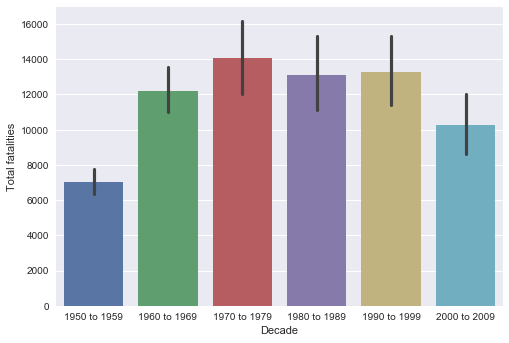

In [40]:
### The mean number of fatalities had decreased since 1980s. 
### Advancement in technology might be the core reason for this decrement.
sns.barplot(x="Decade", y="fatalities",data=crash,estimator=sum)
plt.ylabel("Total fatalities")
plt.show()

In [11]:
### Number of aboard, fatalities and survived human beings per decade.
info_by_decade= crash.groupby("Decade")["aboard","fatalities"].sum()
info_by_decade["survived"] = info_by_decade["aboard"] - info_by_decade["fatalities"]
info_by_decade


,aboard,fatalities,survived
Decade,,,
1950 to 1959,9120,7027,2093
1960 to 1969,15527,12191,3336
1970 to 1979,18219,14093,4126
1980 to 1989,19013,13091,5922
1990 to 1999,20846,13287,7559
2000 to 2009,14304,10248,4056


In [12]:
### Top 50 routes for the maximum fatalities?
crash_by_route = crash.groupby("route")["aboard","fatalities"].sum()
crash_by_route.sort_values("fatalities",ascending=False).head(50)


,aboard,fatalities
route,,
Tenerife - Las Palmas / Tenerife - Las Palmas,644,583
Tokyo - Osaka,561,557
Paris - London,378,375
New Delhi - Dhahran / Chimkent - New Delhi,349,349
Montreal - London,329,329
Riyadh - Jeddah,301,301
Bandar Abbas - Dubai,290,290
Zahedan - Kerman,275,275
"Chicago, IL- Los Angeles, CA",271,271


plt.boxplot(crash["aboard"])
plt.ylabel("number of people aboard")
plt.show()

In [14]:
### There are 2180 Unique routes 
crash["route"].value_counts().head()

Training                      40
Sightseeing                   22
Test flight                    5
Sao Paulo - Rio de Janeiro     4
Test                           3
Name: route, dtype: int64

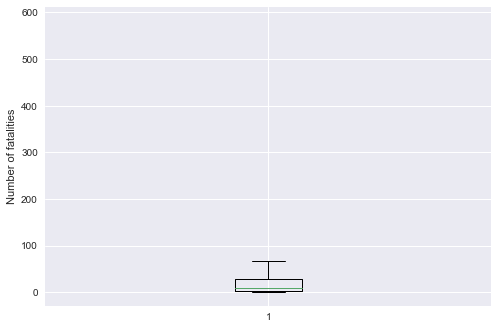

In [15]:
### There is a huge variation in the number of deaths occured in these years.But the majority of the range falls in the reange of
### 80 to 200.
plt.boxplot(crash["fatalities"])
plt.ylabel("Number of fatalities")
plt.show()

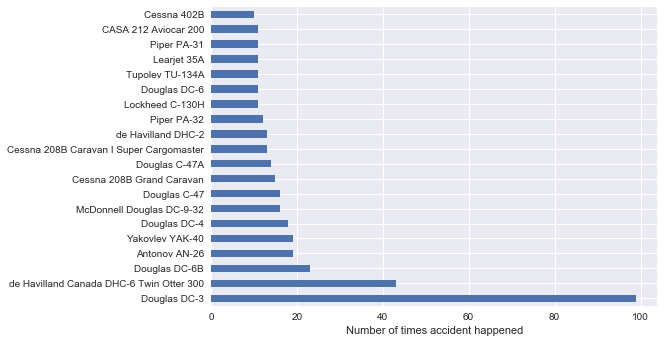

In [16]:
# QUESTION 1 
### There were 1527 unique aircrafts.
### Which aircraft had maximum number of accidents?

crash["type"].value_counts().head(20).plot(kind="barh")
plt.xlabel("Number of times accident happened")

# Douglas DC-3 clearly surpassed the number of casualities happened with the total of 99. And Otter 300 with total of 43.

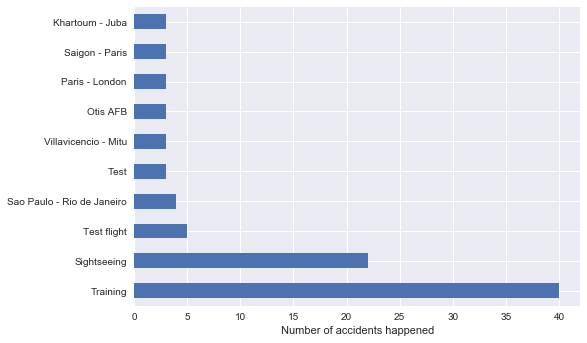

In [17]:
### Training and Sightseeing were the topmost routes that had the maximum number of accidents.
crash["route"].value_counts().head(10).plot(kind="barh")
plt.xlabel("Number of accidents happened")
plt.show()

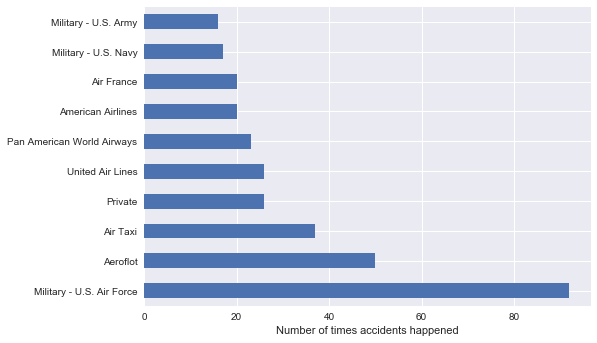

In [18]:
# QUESTION 3:
# Which operator had maximum number of accidents?

crash["operator"].value_counts().head(10).plot(kind="barh")
plt.xlabel("Number of times accidents happened")

# Military - US Air Force had total of 92 accidents and Aeroflot had 50.

In [19]:
# QUESTION 5:
# What's the total number of deaths occured from "Training" alone?

ro_fat = crash[crash["route"] == "Training"]
ro_fat["fatalities"].sum()

# Although the crash route of Training happend maximum number of times but the death toll associated witb that 
# crash was only 229 from total of 69937.

229

In [20]:
#FUTURE QUESTIONS:
### Having analyzed the fatalities per decade, there seems to not been a steady decrease in the number of fatalities 
### which is concerning as one would expect with the improvement of technology this would have subsided.
### This necessitates further investigation into the root causes of crashes
### In order to conduct further research you need to collect more data - specifically, recordings of the pilot 
### through the entire flight and you would like to use voice recognition/NLP to extract further information 
### along with aircraft preflight maintanenece reports. 

